In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
filename="train.csv"
df = pd.read_csv(filename)

In [3]:
import numpy 

def getEncodings(dataframe):
    encodings = {}
    for column in dataframe.columns:
        column_values = df[column]
        #print(type(column_values[0]))
        #print(column)
        if isinstance(column_values[0],str) or column=="Alley" or column=="FireplaceQu" or column=="PoolQC" or column=="Fence" or column=="MiscFeature":  
            encoder = {}
            counter = 1
            for value in column_values.unique():
                encoder[value]=counter
                counter = counter + 1
            encodings[column]= encoder
    return encodings

encodings = getEncodings(df)
print(encodings)

{'MSZoning': {'RL': 1, 'RM': 2, 'C (all)': 3, 'FV': 4, 'RH': 5}, 'Street': {'Pave': 1, 'Grvl': 2}, 'Alley': {nan: 1, 'Grvl': 2, 'Pave': 3}, 'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4}, 'LandContour': {'Lvl': 1, 'Bnk': 2, 'Low': 3, 'HLS': 4}, 'Utilities': {'AllPub': 1, 'NoSeWa': 2}, 'LotConfig': {'Inside': 1, 'FR2': 2, 'Corner': 3, 'CulDSac': 4, 'FR3': 5}, 'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3}, 'Neighborhood': {'CollgCr': 1, 'Veenker': 2, 'Crawfor': 3, 'NoRidge': 4, 'Mitchel': 5, 'Somerst': 6, 'NWAmes': 7, 'OldTown': 8, 'BrkSide': 9, 'Sawyer': 10, 'NridgHt': 11, 'NAmes': 12, 'SawyerW': 13, 'IDOTRR': 14, 'MeadowV': 15, 'Edwards': 16, 'Timber': 17, 'Gilbert': 18, 'StoneBr': 19, 'ClearCr': 20, 'NPkVill': 21, 'Blmngtn': 22, 'BrDale': 23, 'SWISU': 24, 'Blueste': 25}, 'Condition1': {'Norm': 1, 'Feedr': 2, 'PosN': 3, 'Artery': 4, 'RRAe': 5, 'RRNn': 6, 'RRAn': 7, 'PosA': 8, 'RRNe': 9}, 'Condition2': {'Norm': 1, 'Artery': 2, 'RRNn': 3, 'Feedr': 4, 'PosN': 5, 'PosA': 6, 'RRAn': 7, 

In [4]:
def applyEncodings(dataframe,encodings):
    return dataframe.replace(encodings)
clean_column=applyEncodings(df,encodings).fillna(0)
clean_column=pd.DataFrame(clean_column)
clean_column.to_csv("cleanit.csv")

clean_column.drop(['MiscFeature','MiscVal','Fireplaces','BsmtFinType2','PoolArea','TotRmsAbvGrd','GarageYrBlt','Id'], inplace=True, axis=1)
features=clean_column #copy of the data
main_target_price = clean_column.filter([['SalePrice']])
main_overall_condition=clean_column.filter(['OverallQual'])
print(clean_column.columns)
#features.drop('SalePrice', inplace=True, axis=1)







Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'Scre

In [5]:
#main_target_price = clean_column.filter(['SalePrice'])
#main_overall_condition=clean_column.filter(['OverallQual'])


train_data, test_data, train_target, test_target = train_test_split( main_overall_condition, main_target_price, test_size=0.3, random_state=0)

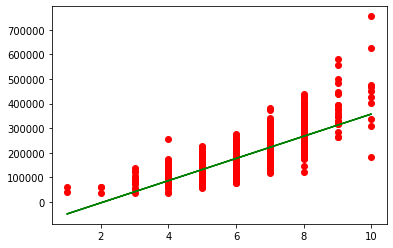

In [38]:
lr=LinearRegression()
lr.fit(train_data,train_target)
#print(type(train_data))
y=lr.predict(train_data)
#print(len(test_target))
plt.scatter(train_data, train_target, color = "red")
plt.plot(train_data.to_numpy(), y, color = "green")
# plt.title("Salary vs Experience (Training set)")
# plt.xlabel("Years of Experience")
# plt.ylabel("Salary")
# plt.show()

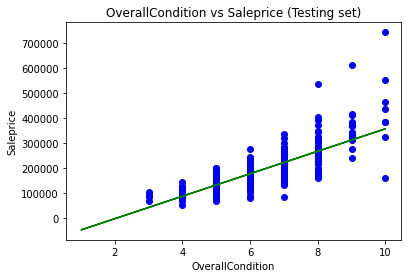

In [40]:


plt.scatter(test_data, test_target, color = "blue")
plt.plot(train_data.to_numpy(), y, color = "green")
plt.title("OverallCondition vs Saleprice (Testing set)")
plt.xlabel("OverallCondition")
plt.ylabel("Saleprice")
plt.show()
